# Experiment of fractional exponent to particle filter

1. generate some samples
1. estimate the distribution (discrete)
1. generate reduced distributions by different processes
    1. proc1
        1. directly apply the fractional exponent to the estimated dist with normalization
    1. proc2
        1. calculate weights (proposed method!)
        1. resampling
        1. estimate the distribution based on the resampled ones
1. compare the two distributions


In [1]:
import random
import math
import matplotlib.pyplot as plt
import statistics

In [2]:
f_optimize_sigma = False
sigma_def = 15

# generate some samples

In [3]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
samples = []
for i in range(n_samples):
    #samples.append(random.uniform(rng[0] + (rng[1]-rng[0])*0.1, rng[1] - (rng[1]-rng[0])*0.1))
    if i % 5 == 0:
        samples.append(rng[0] + (rng[1]-rng[0])*0.5)
    else:
        samples.append(random.uniform(rng[0], rng[1]))
    #samples.append(random.uniform(rng[0], rng[1]))
    #samples.append(random.gauss((rng[0]+rng[1])/2.0, (rng[1]-rng[0])/2.0 * 0.1))
print("max: " + str(max(samples)))
print("min: " + str(min(samples)))

max: 99.97569330997018
min: 0.11711760061712262


# estimate the distribution (discrete)

In [4]:
sigma_opt = lambda s: statistics.variance(s) * math.pow(4.0/3.0/len(s), 1.0/5.0)
k = lambda x1, x2, sigma=5: math.exp(-(x1 - x2)**2/sigma/sigma)
x = rng[0]
N = int((rng[1]-rng[0])/dlt+1)
x_axis = [rng[0] + i * dlt for i in range(N)]

def estPDF(samples):
    x = rng[0]
    p = [0] * N
    sigma = sigma_opt(samples) if f_optimize_sigma else sigma_def
    for i in range(N):
        x = rng[0] + i * dlt
        for s in samples:
            p[i] += k(x, s, sigma)
    sum_p = sum(p) * dlt
    for i in range(len(p)):
        p[i] /= sum_p
    return p
def showPDF(p, title, ylim=None):
    plt.scatter(x_axis, p)
    plt.ylabel(title)
    if ylim != None:
        plt.ylim(0, ylim)
    plt.show()
    print('sum: ' + str(sum(p)*dlt))

In [5]:
p = estPDF(samples)

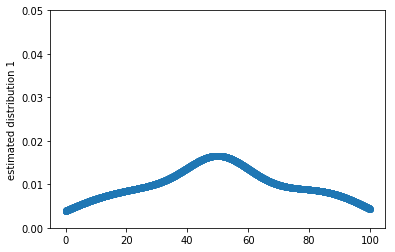

sum: 0.9999999999999976


In [6]:
showPDF(p, 'estimated distribution 1', 0.05)

# generate reduced distributions by different processes

In [7]:
omega = 0.1

# proc1
1. directly apply the fractional exponent to the estimated dist with normalization

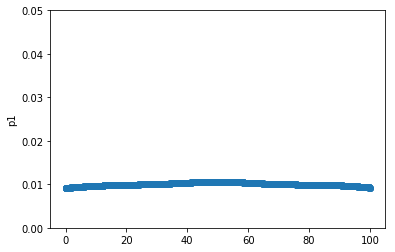

sum: 0.999999999999999


In [8]:
p1 = [0] * len(p)
sum_p1 = 0
for i in range(len(p)):
    p1[i] = math.pow(p[i], omega)
sum_p1 = sum(p1) * dlt
for i in range(len(p1)):
    p1[i] /= sum_p1
showPDF(p1, 'p1', 0.05)

# proc2
1. calculate weights (proposed method!)
1. resampling
1. estimate the distribution based on the resampled ones

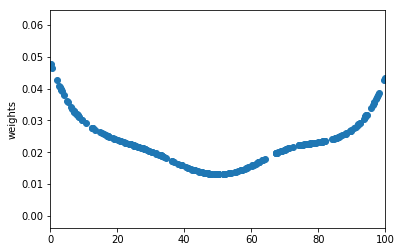

In [9]:
weights = [0] * n_samples
sigma = sigma_opt(samples) if f_optimize_sigma else sigma_def
for i in range(n_samples):
    for j in range(n_samples):
        weights[i] += k(samples[i], samples[j], sigma)
    weights[i] = math.pow(weights[i], omega - 1)
plt.scatter(samples, weights)
plt.ylabel('weights')
#plt.ylim(0, 0.2)
plt.xlim(rng[0], rng[1])
plt.show()

In [10]:
next_samples = [0] * n_samples
sum_weight = sum(weights)
print('sum of weights: ' + str(sum_weight))
for i in range(n_samples):
    r = random.uniform(0.0, sum_weight)
    temp = 0
    for j in range(n_samples):
        temp += weights[j]
        if r <= temp or j == n_samples - 1:
            next_samples[i] = samples[j]
            break

sum of weights: 6.25409329828281


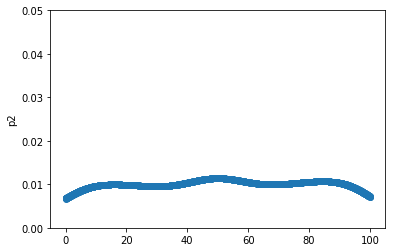

sum: 1.0000000000000009


In [11]:
p2 = estPDF(next_samples)
showPDF(p2, 'p2', 0.05)

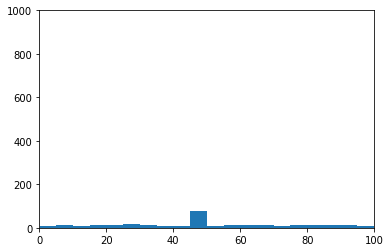

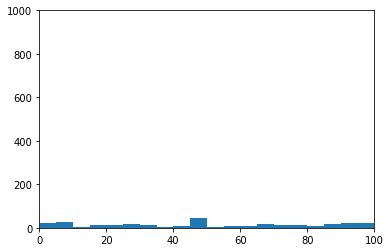

In [12]:
plt.ylim(0, 1000)
plt.xlim(rng[0], rng[1])
plt.hist(samples, bins=20)
plt.show()
plt.ylim(0, 1000)
plt.xlim(rng[0], rng[1])
plt.hist(next_samples, bins=20)
plt.show()

# compare the two distributions

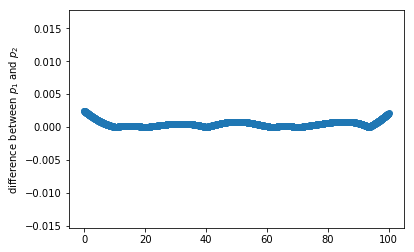

sum: 0.04723052657803264


In [13]:
diff = [0] * len(p)
for i in range(len(diff)):
    diff[i] = abs(p1[i] - p2[i])
showPDF(diff, 'difference between $p_1$ and $p_2$')
#showPDF(diff, 'difference between $p_1$ and $p_2$', 0.01)

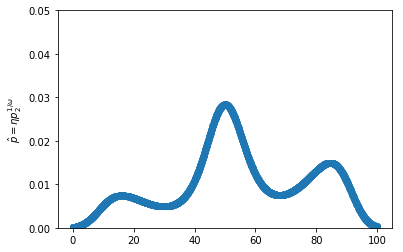

sum: 0.999999999999999


In [14]:
p_hat = [0] * len(p)
p_hat_sum = 0
for i in range(len(p_hat)):
    p_hat[i] = math.pow(p2[i], 1 / omega)
    p_hat_sum += p_hat[i]*dlt
for i in range(len(p_hat)):
    p_hat[i] /= p_hat_sum
showPDF(p_hat, '$\hat{p}=\eta p_2^{1/\omega}$', 0.05)

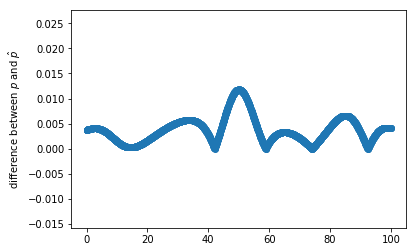

sum: 0.3756555492452853


In [15]:
diff = [0] * len(p_hat)
for i in range(len(diff)):
    diff[i] = abs(p[i] - p_hat[i])
showPDF(diff, 'difference between $p$ and $\hat{p}$')